# EGT207- Machine Learning Project


##### Problem Statement: Given the Inputs, detect if the patient is Healthy or has Parkinson's Disease

## Cleaning the Dataset 

In [132]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [133]:
## Loading Dataset 

parkinson_df = pd.read_csv('parkinson_disease_assignment - Copy.csv')

parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,L


In [134]:
parkinson_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'DCAT'],
      dtype='object')

1.	name: The identifier of the voice recording for each individual.
2.	MDVP:Fo(Hz): Average vocal fundamental frequency.
3.	MDVP:Fhi(Hz): Maximum vocal fundamental frequency.
4.	MDVP:Flo(Hz): Minimum vocal fundamental frequency.
5.	MDVP:Jitter(%): Measure of variation in fundamental frequency.
6.	MDVP:Jitter(Abs): Absolute measure of variation in fundamental frequency.
7.	MDVP:RAP: Relative average perturbation, another measure of frequency variation.
8.	MDVP:PPQ: Five-point period perturbation quotient.
9.	Jitter:DDP: Average absolute difference of differences between periods.
10.	MDVP:Shimmer: Measure of variation in amplitude.
11.	MDVP:Shimmer(dB): Another measure of variation in amplitude in decibels.
12.	Shimmer:APQ3: Three-point amplitude perturbation quotient.
13.	Shimmer:APQ5: Five-point amplitude perturbation quotient.
14.	MDVP:APQ: Eleven-point amplitude perturbation quotient.
15.	Shimmer:DDA: Average absolute difference of differences between amplitudes.
16.	NHR: Noise-to-harmonics ratio.
17.	HNR: Harmonics-to-noise ratio.
18.	status: Health status of the subject (1 = Parkinson’s, 0 = healthy).
19.	RPDE: Recurrence period density entropy, a nonlinear dynamical complexity measure.
20.	DFA: Detrended fluctuation analysis, another measure of signal complexity.
21.	spread1: Nonlinear measure of fundamental frequency variation.
22.	spread2: Nonlinear measure of fundamental frequency variation.
23.	D2: Correlation dimension, a measure of signal complexity.
24.	PPE: Pitch period entropy, a measure of variation in pitch period.
25.	DCAT: Data category label (e.g., ‘N’ for Normal, ‘L’ for Low, ‘M’ for Medium).

In [135]:
#remove missing values 

parkinson_missing = parkinson_df.isna().sum()


#removing parkinson_missing 

parkinson_df = parkinson_df.dropna()


In [136]:
#checking for duplicated and removing them 

parkinson_duplicated = parkinson_df.duplicated().sum()

print(f"{parkinson_duplicated}")

0


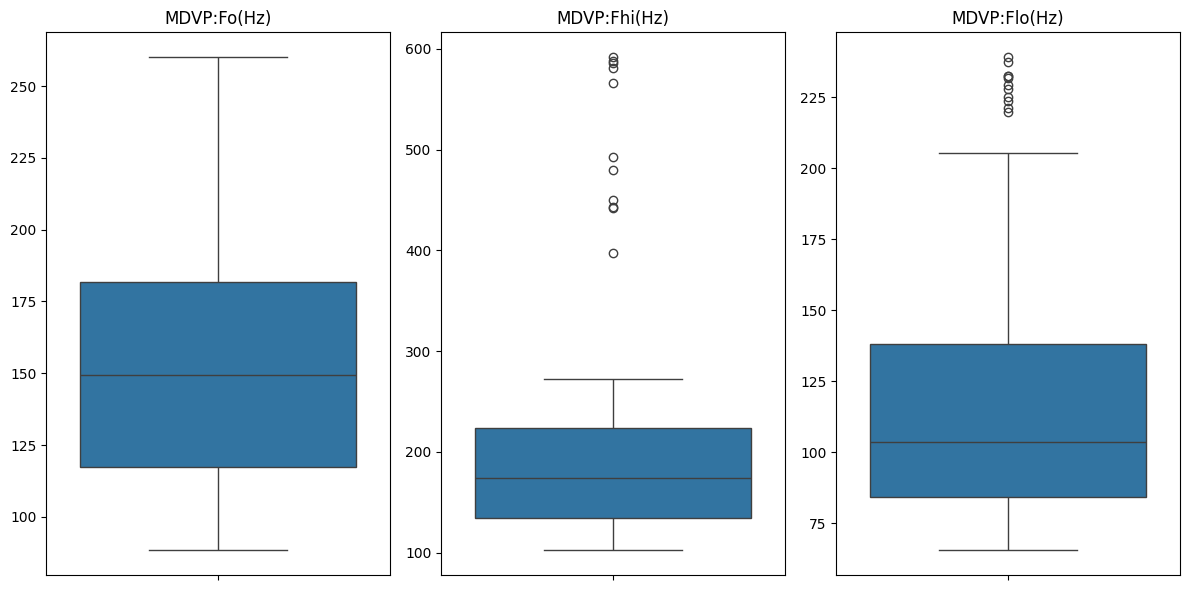

In [137]:
#find out the outliers by plotting Box-Plot using sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))


sns.boxplot(parkinson_df['MDVP:Fo(Hz)'], ax=ax1)
ax1.set_title('MDVP:Fo(Hz)')
ax1.set_ylabel('')

sns.boxplot(parkinson_df['MDVP:Fhi(Hz)'], ax=ax2)
ax2.set_title('MDVP:Fhi(Hz)')
ax2.set_ylabel('')

sns.boxplot(parkinson_df['MDVP:Flo(Hz)'], ax=ax3)
ax3.set_title('MDVP:Flo(Hz)')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()


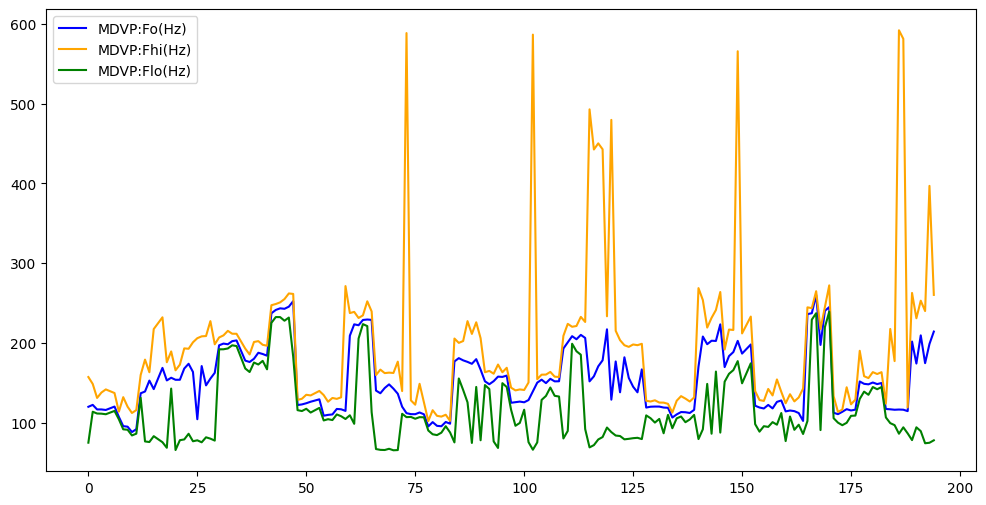

In [138]:
#plotting box plots in line graphs 


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(parkinson_df['MDVP:Fo(Hz)'], label='MDVP:Fo(Hz)', color='blue')
ax.plot(parkinson_df['MDVP:Fhi(Hz)'], label='MDVP:Fhi(Hz)', color='orange')
ax.plot(parkinson_df['MDVP:Flo(Hz)'], label='MDVP:Flo(Hz)', color='green')

ax.legend()
plt.show()

In [139]:
columns_to_remove = ['name', 'DCAT']

parkinson_df = parkinson_df.drop(columns=columns_to_remove, axis=1)

parkinson_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Planting the Decision Tree

In [140]:
parkinson_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [141]:
# features and targets
features = parkinson_df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']]

target = parkinson_df[['status']]

#split data into three sets 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [142]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print("\n")
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)
print("\n")
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train:  (152, 22)
y_train:  (152, 1)


X_test:  (19, 22)
y_test:  (19, 1)


X_val: (19, 22)
y_val: (19, 1)


In [143]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
important_features = {} #empty dic

feature_names = list(features.columns)

feature_importances = list(clf.feature_importances_)

for i in range(len(feature_names)):
    #populate the dictionary
    important_features[feature_names[i]] = float(feature_importances[i])

print("Most Important Feature: ", feature_names[feature_importances.index(max(feature_importances))])


Most Important Feature:  spread1


In [145]:
accuracy = clf.score(X_val, y_val)

print("Accuracy of Validation Set: ", accuracy)

Accuracy of Validation Set:  0.8947368421052632


In [146]:
accuracy1 = clf.score(X_test, y_test)

print("Accuracy of Test Set:", accuracy1)

Accuracy of Test Set: 0.8421052631578947


### Fine Tune Hyperparameters

In [150]:
clf1 = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=100)

clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=100)

In [153]:
#check the model accuracy 

fine_tune_accuracy = clf.score(X_val, y_val)

print("Accuracy: ", fine_tune_accuracy)

Accuracy:  0.8947368421052632


Since the accuracy of the model on the validation set and the test set is close enough, we can proceed on and treat this as the final model and go ahead with the classification accuracy report

### Prediction

In [ ]:
preds = clf.predict(X_test)
preds


In [ ]:
dt_accuracy = accuracy_score(y_test, preds)
dt_report = classification_report(y_test, preds)

print(f"The decision tree accuracy is {dt_accuracy} \n")
print(f"The decison tree classification report is \n\n {dt_report}")

## Analysis of DT

The model seems to be doing well in predicting patients that have PD as compared to healthy patients.

- Possible Reasons, the data could have been skewed => more number of rows that have status = 1, ie: more riws with PD

In [ ]:
parkinson_df['status'].value_counts()

In [ ]:
y_train['status'].value_counts()